# Lesson I 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Does Time of day Affect arrest rate?

In chapter 1, we worked with small DataFrame of Apple Stock prices. We're going to use it here again, but this time it includes two days each from the first three months of 2018. There's also a new column, volume, that displays the number of Apple shares traded that day.

In [16]:
# Import packages
import pandas as pd

# Apple DataFrame
apple = pd.read_csv('datasets/apple.csv')

In [2]:
apple

,price,volume,date_and_time
0,174.35,20567800,2018-01-08 16:00:00
1,174.33.,21584000,2018-01-09 16:00:00
2,155.15,54390500,2018-02-08 16:00:00
3,156.41,70672600,2018-02-09 16:00:00
4,176.94,23774100,2018-03-08 16:00:00
5,179.98,32185200,2018-03-09 16:00:00


### Accessing datetime attributes
Lets convert the ``date_and_time`` column to a datetime format. So we can access to special data-based attributes via ``dt`` accesor.

For example, We can access the month as integer by using the ``dt.month`` attribute.

In [17]:
# Formatting 'date_and_time' column to a datetime
apple['date_and_time'] = pd.to_datetime(apple.date_and_time)

# Check the data types
print(apple.dtypes)

# Accessing the month value in datetime
print(apple.date_and_time.dt.month)

price                   float64
volume                    int64
date_and_time    datetime64[ns]
dtype: object
0    1
1    1
2    2
3    2
4    3
5    3
Name: date_and_time, dtype: int64


We can also set the ``date_and_time`` column as the DataFrame index. Now the data type will be a *DatetimeIndex*, we can still access the same datetime attributes, such as month, but we no longer need to use the ``dt`` accessor.

In [18]:
# Setting the index
apple.set_index('date_and_time', inplace=True)

# Check the index
print(apple.index)

# Check the month value of index
print(apple.index.month)

# Notice we didn't use the 'dt' accessor.

DatetimeIndex(['2018-01-08 16:00:00', '2018-01-09 16:00:00',
               '2018-02-08 16:00:00', '2018-02-09 16:00:00',
               '2018-03-08 16:00:00', '2018-03-09 16:00:00'],
              dtype='datetime64[ns]', name='date_and_time', freq=None)
Int64Index([1, 1, 2, 2, 3, 3], dtype='int64', name='date_and_time')


### Calculating the monthly mean price

Let's examine the price column of the apple DataFrame. If we wanted to calculate the mean price for all rows, we would simply use the ``mean()`` method. But what if we wanted to calculate the mean price for each month? 

One idea would be to use a ``groupby()`` operation, but we can't group by month as a string since it's not a column in the DataFrame. Instead, we would group by ``apple.index.month``, and then take the ``mean()`` of the price column. 

This operation outputs a *Series*, in which the index is the month number and the values are the mean prices. We'll go ahead and save this Series as an object called ``monthly_price``.

In [21]:
# Convert price column into a float
apple['price'] = apple['price'].astype('float')

# Mean of all rows
apple.price.mean()

169.52666666666667

In [23]:
# Using groupby method to see mean of each month
monthly_price = apple.groupby(apple.index.month).price.mean()    

### Plotting the monhly mean price

Let's say that we wanted to plot this data in order to visually examine the monthly price trends. We would start by importing ``matplotlib.pyplot as plt``. Then, we call the ``plot()`` method on the ``monthly_price`` *Series*. 

The default plot for a Series is a **line plot**, which uses the Series index on the x-axis and the Series values on the y-axis. 

Finally, we'll label the axes and provide a title for the plot, and then use the ``show()`` function to display the plot.

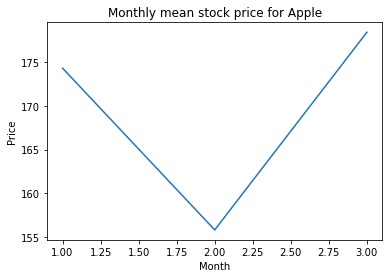

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot data
monthly_price.plot()

# Label the Axes and add a Tittle
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')

# Show plot
plt.show()

In [28]:
# Police DataFrame
ri = pd.read_csv('datasets/police.csv')

## Cleaning and validating DataFrame as in Chapter 1
# Dropping the county_name column
ri.drop('county_name', axis='columns', inplace=True)
# Dropping stop_date and stop time rows with missing values
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)
# Dropping state column
ri.drop('state', axis='columns', inplace=True)
# Dropping driver_gender rows with missing values
ri.dropna(subset=['driver_gender'], inplace=True)

## Changing the Data Types
# Change the is_arrested column into a bool type
ri['is_arrested'] = ri.is_arrested.astype('bool')
# Combined stop date and stop time into a one column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
# Convert combined column into a datetime
ri['stop_datetime'] = pd.to_datetime(combined)
# Set combined column into an index
ri.set_index('stop_datetime', inplace=True)
# Check the DataFrame
ri.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


## Exercise

### Calculating the hourly Arrest Rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops in the ``ri`` DataFrame. Then, you'll calculate the hourly arrest rate by using the ``hour`` attribute of the index. The hour ranges from 0 to 23, in which:

* 0 = midnight
* 12 = noon
* 23 = 11 PM

In [32]:
# Calculate the Overall Arrest Rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


### PLotting the hourly Arrest Rate

In this exercise, you'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

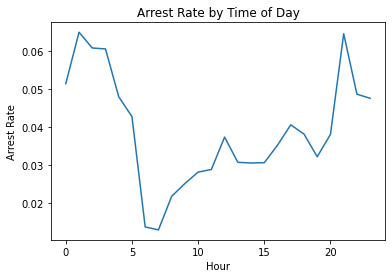

In [33]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the labels and tittle
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Show plot
plt.show()

# Lesson II

## Are drug-related stops on the rise?

In this section, we'll use subplots to help us examine the relationship between two variables over time.

### Resampling the price

In the last section, we calculated the mean price for each month using a ``groupby()`` operation. There's actually an alternative method, known as **resampling**, that we can use to accomplish the same task.

As you might remember from previous courses, resampling is when you change the frequency of your time series observations.

In this case, we'll resample the price column by month, represented by the capital letter ``M``, and then chain the ``mean()`` method onto the end. The output is **identical** to the ``groupby()`` operation, except that the index consists of the *last day of each month*, rather than just the integers 1, 2, and 3.

In [34]:
apple.price.resample('M').mean()

date_and_time
2018-01-31    174.34
2018-02-28    155.78
2018-03-31    178.46
Freq: M, Name: price, dtype: float64

### Resampling the Volume

As a reminder, the apple DataFrame also has a volume column that displays the number of Apple shares traded that day. Let's resample that column, to calculate the mean daily volume for each month. One thing worth noticing is that the output has the same index as the last resampling operation, since both price and volume were resampled at the same frequency.

In [35]:
apple.volume.resample('M').mean()

date_and_time
2018-01-31    21075900.0
2018-02-28    62531550.0
2018-03-31    27979650.0
Freq: M, Name: volume, dtype: float64

### Concatenating price and volume

Now that we've resampled both the price and volume data, we're going to combine the results into a single DataFrame so that we can study the relationship between price and volume. 

First, we'll save the two resampled Series as separate objects. One is called ``monthly_price`` and the other is called ``monthly_volume``.

In [36]:
monthly_price = apple.price.resample('M').mean()
monthly_volume = apple.volume.resample('M').mean()

Then, we'll combine these two objects using the ``concat()`` function, which concatenates pandas objects along a specified axis. In this case, we want them to be combined along the columns axis, meaning that we want them side-by-side.

In [37]:
pd.concat([monthly_price, monthly_volume], axis='columns')

,price,volume
date_and_time,,
2018-01-31,174.34,21075900.0
2018-02-28,155.78,62531550.0
2018-03-31,178.46,27979650.0


Notice that they aligned along their shared index. 
 
We'll save this new DataFrame as an object called ``monthly``.

In [39]:
monthly = pd.concat([monthly_price, monthly_volume], axis='columns')

### Plotting Price and Volume

To visualize the relationship between price and volume, we simply call the ``plot()`` method on the monthly DataFrame. 

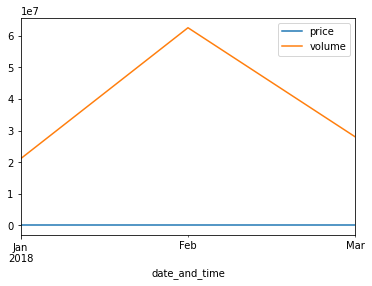

In [40]:
monthly.plot()
plt.show()

``pandas`` outputs a single line plot in which each line represents one of the two columns. Because it's a single plot, the two lines are sharing both the x and y axes. It makes sense for the x-axis to be shared, since we want to compare price and volume by month. But sharing the y-axis is problematic, because price and volume are on such different scales: price is in the hundreds, and volume is in the tens of millions, represented by the 1e7 notation at the top of the y-axis. Because of the different scales, we can't actually see the price trend.

The solution to this problem is to set the ``subplots`` parameter to ``True``, which results in two separate plots with independent y axes. Now we can clearly see the monthly trends for both price and volume.

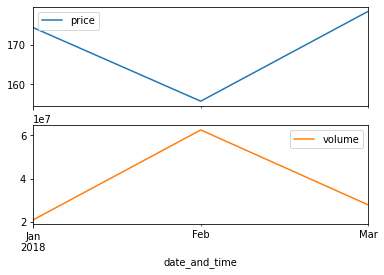

In [41]:
monthly.plot(subplots=True)
plt.show()

## Exercise

### Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the annual drug rate by resampling this column, and then you'll use a line plot to visualize how the rate has changed over tim

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


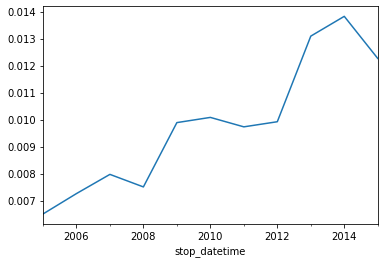

In [45]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Show plot
plt.show()

### Comparing drug and search rates

As you saw in the last exercise, the rate of drug-related stops increased significantly between 2005 and 2015. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

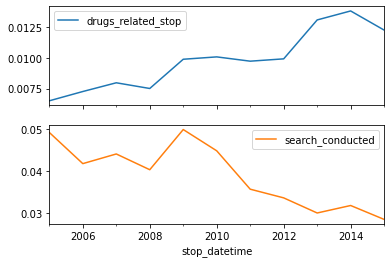

In [46]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Show plot
plt.show()